<a href="https://colab.research.google.com/github/mahin-arvind/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduction
Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).


#2 **Data Description**

**date:** time year-month-day hour:minute:second

**Appliances:** energy use in Wh (Dependent variable)

**lights:** energy use of light fixtures in the house in Wh (Drop this column)

**T1**, Temperature in kitchen area, in Celsius

**RH1**: Humidity in kitchen area, in % T2, 

**Temperature**: in living room area, in Celsius 

**RH2**:
Humidity in living room area, in %

**T3:** Temperature in laundry room area

**RH3:** Humidity in laundry room area, in % 

**T4:** Temperature in office room, in Celsius 

**RH4:**Humidity in office room, in %

**T5:** Temperature in bathroom, in Celsius

**RH5:** Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius

**RH6:** Humidity outside the building (north side), in %

**T7:** Temperature in ironing room , in Celsius

**RH7:** Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius 

**RH8**: Humidity in teenager room 2, in %

**T9:** Temperature in parents room, in Celsius

**RH9:** Humidity in parents room, in % To, Temperature outside (from Chievres weather station), inCelsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %

**Wind speed:** (from Chievres weather station), in m/s

**Visibility:** (from Chievres weather station), in km

**Tdewpoint:** (from Chievres weather station), Â°C

**rv1:** Random variable 1, nondimensional

**rv2:** Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

# 3 Importing Libraries and Dataset 

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
path = '/content/drive/MyDrive/Datasets/Regression/Appliances Energy Prediction/data_application_energy.csv'
df = pd.read_csv(path)

###Inspection

In [146]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Dropping Lights column as instructed


In [147]:
df.drop('lights', axis =1, inplace = True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

It is observed that all the features other than date is a numerical attribute and no null values are present in the given data

Object type attribute date is converted to datetype and its characteristics such as day of the month, day of the week, month, year, hour of day and minutes are extracted individually to make better sense 

In [149]:
df.date = pd.to_datetime(df.date) #extract features from this later

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   T1           19735 non-null  float64       
 3   RH_1         19735 non-null  float64       
 4   T2           19735 non-null  float64       
 5   RH_2         19735 non-null  float64       
 6   T3           19735 non-null  float64       
 7   RH_3         19735 non-null  float64       
 8   T4           19735 non-null  float64       
 9   RH_4         19735 non-null  float64       
 10  T5           19735 non-null  float64       
 11  RH_5         19735 non-null  float64       
 12  T6           19735 non-null  float64       
 13  RH_6         19735 non-null  float64       
 14  T7           19735 non-null  float64       
 15  RH_7         19735 non-null  float64       
 16  T8  

In [151]:
df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


since mean,maximum and minimum value of columns 'year' and 'seconds' is same with 0 standard deviation, we can drop these as well as they are zero-variance attributes 

In [152]:
df.shape

(19735, 28)

In [153]:
df.columns

Index(['date', 'Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Looking for duplicate rows

In [154]:
df.duplicated().any()

False

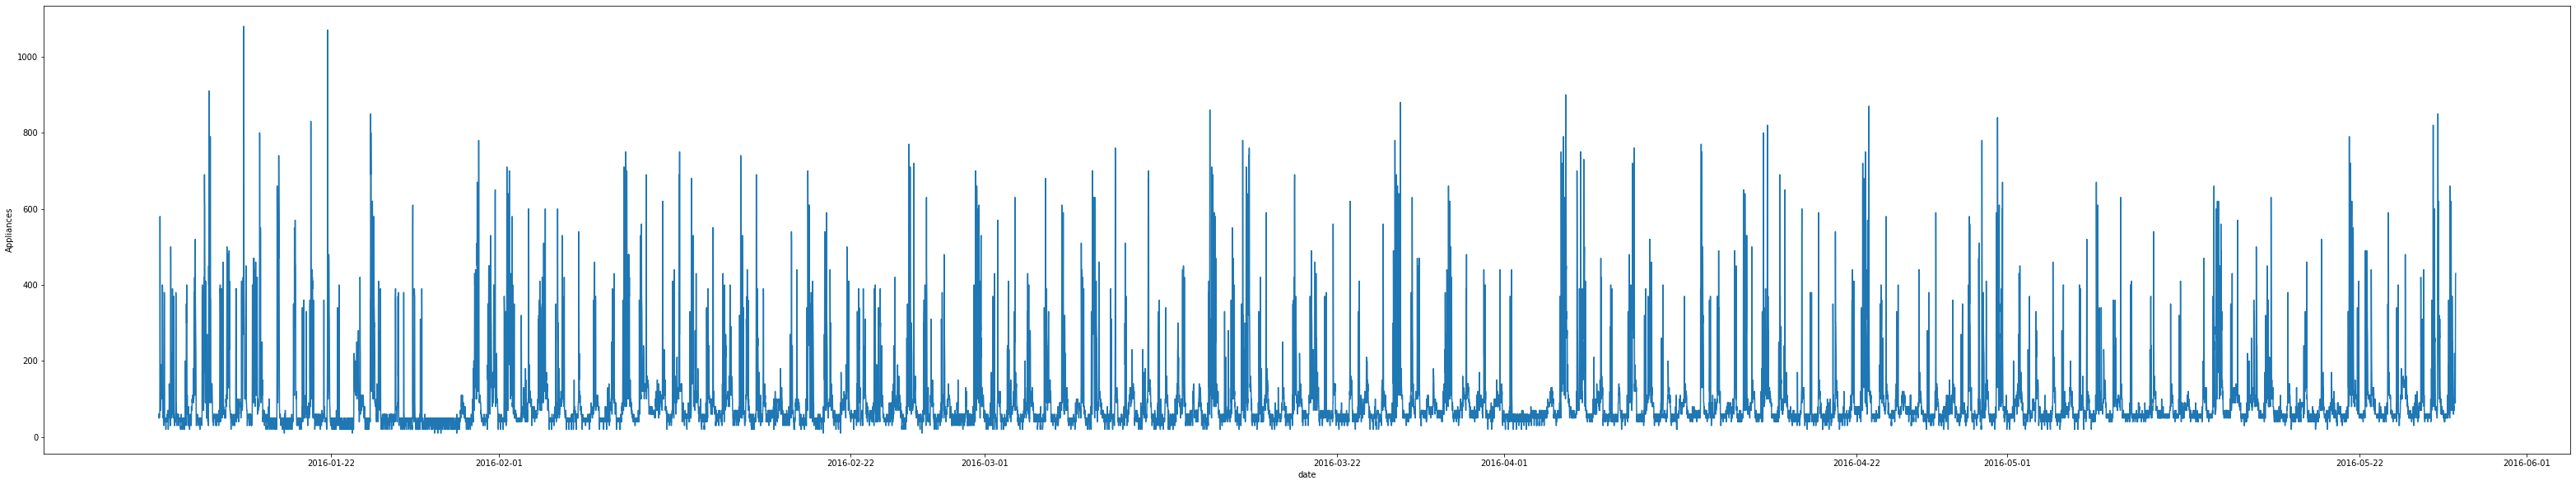

In [155]:
plt.figure(figsize =(55,10))
sns.lineplot(x='date', y = 'Appliances', data = df)

One can approach the following problem using Traditional Supervised ML models and Time Series models as well since the data provides a time component.

Traditional Supervised ML models will be trained as of now

'date' column is extracted to get features like 'year', 'time_of_day', 'day_of_month' and 'day_of_week'

In [156]:
df['date'] = pd.to_datetime(df['date'])
df['time_of_day'] = df['date'].dt.hour + (df['date'].dt.minute)/60 + (df['date'].dt.second)/3600 # this attribute will be further converted into cyclic form 
df['month'] = df['date'].dt.month #categorical
df['day_of_month'] = df['date'].dt.day #
df['day_of_week'] = df['date'].dt.dayofweek

In [157]:
df.drop('date', axis =1, inplace = True)

In [158]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'month', 'day_of_month',
       'day_of_week'],
      dtype='object')

In [159]:
numerical_features = [ 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'time_of_day', 'day_of_month' ]
dependent_feature = ['Appliances']
categorical_feature = ['month','day_of_week']

In [160]:
df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,time_of_day,month,day_of_month,day_of_week
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,11.918647,3.101647,16.057411,2.977249
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,6.927784,1.339200,8.450998,1.985617
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000,1.000000,1.000000,0.000000
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,6.000000,2.000000,9.000000,1.000000
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,12.000000,3.000000,16.000000,3.000000
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,17.833333,4.000000,23.000000,5.000000
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,23.833333,5.000000,31.000000,6.000000


#EDA



##Univariate Analysis

###Numerical Features

 #### Distribution 

In [161]:
len(numerical_features)

28

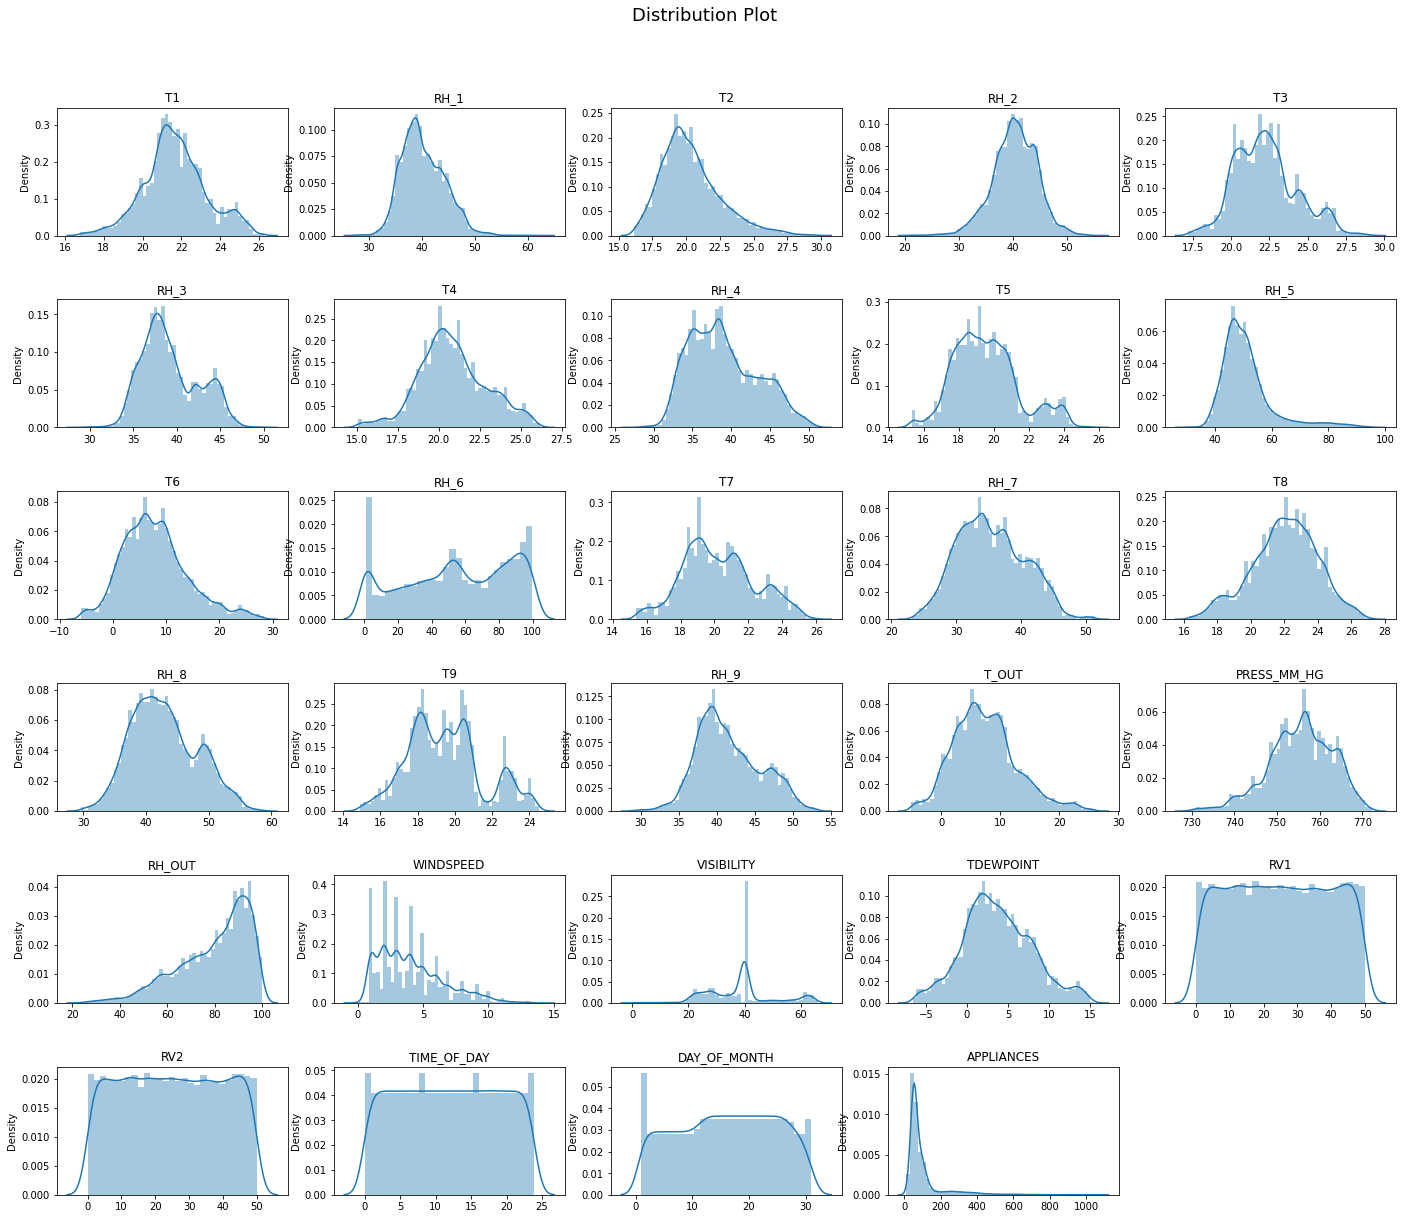

In [162]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(24, 20))
plt.suptitle("Distribution Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(numerical_features + ['Appliances']):
    # add a new subplot iteratively
    ax = plt.subplot(6, 5, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    # filter df and plot ticker on the new subplot axis
    sns.distplot(df[ticker])
    ax.set_title(ticker.upper())
    ax.set_xlabel("")

#### Q-Q plot

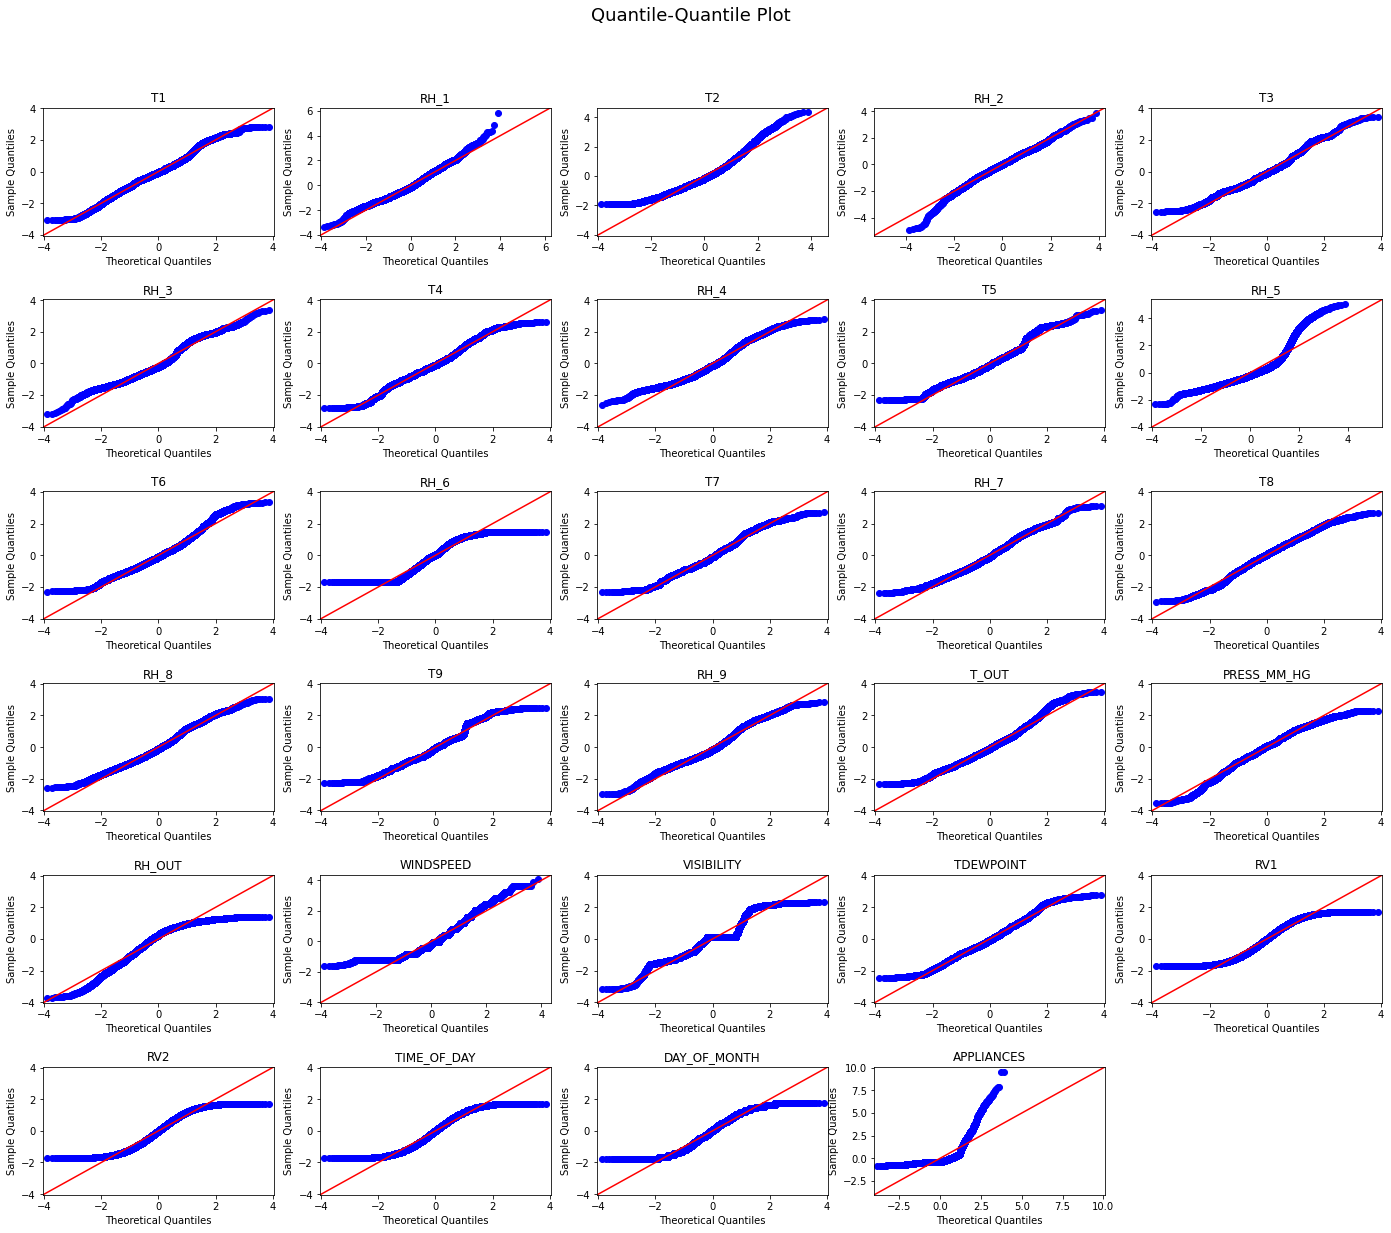

In [163]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

plt.figure(figsize=(24, 20))
plt.suptitle("Quantile-Quantile Plot", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(numerical_features+ ['Appliances']):
    # add a new subplot iteratively
    ax = plt.subplot(6, 5, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    # filter df and plot ticker on the new subplot axis
    sm.qqplot(df[ticker],line='45', fit=True ,dist= 'norm',ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

####Box Plot

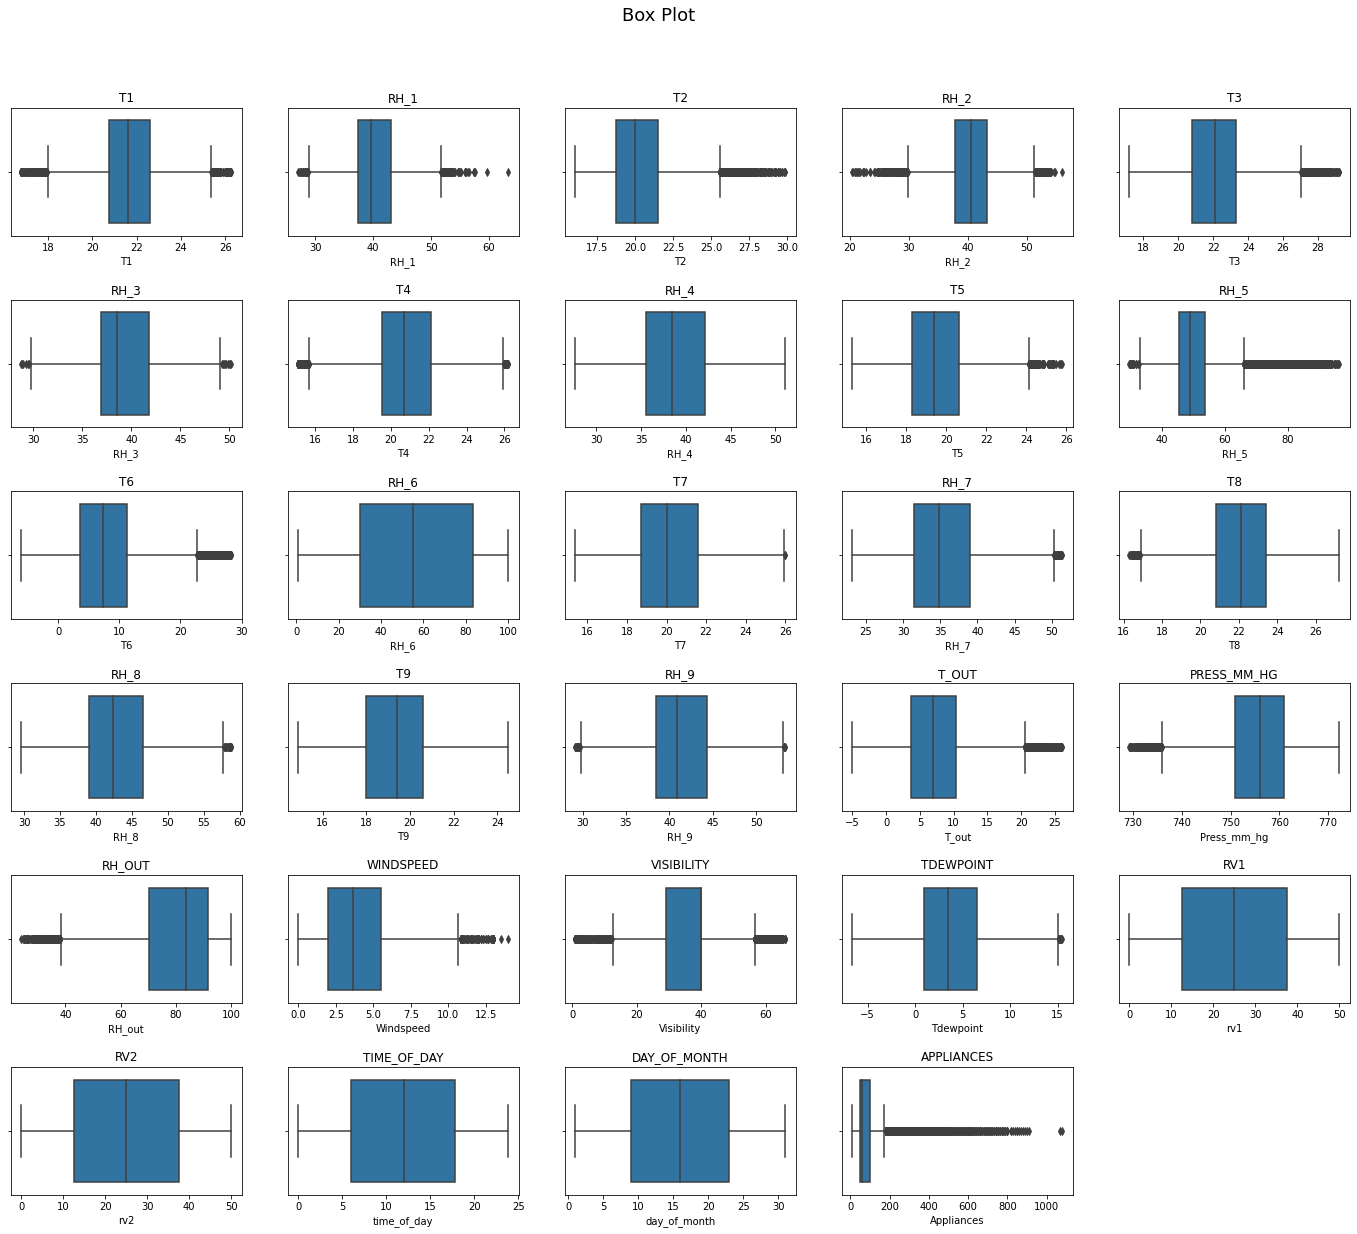

In [164]:

plt.figure(figsize=(24, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(numerical_features+ ['Appliances']):
    # add a new subplot iteratively
    ax = plt.subplot(6, 5, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    # filter df and plot ticker on the new subplot axis
    sns.boxplot(df[ticker],ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

###Categorical Features

Although these features aren't of type 'Object', they are categorical in nature

In [165]:
categorical_feature

['month', 'day_of_week']

####Count Plot

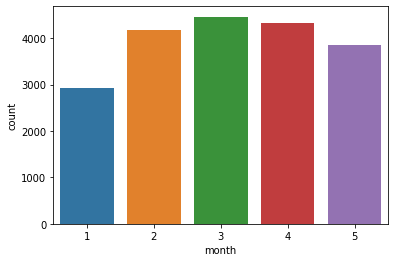

In [166]:
sns.countplot('month', data = df)

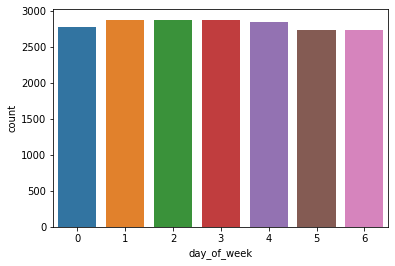

In [167]:
sns.countplot('day_of_week', data = df)

##Bivariate Analysis

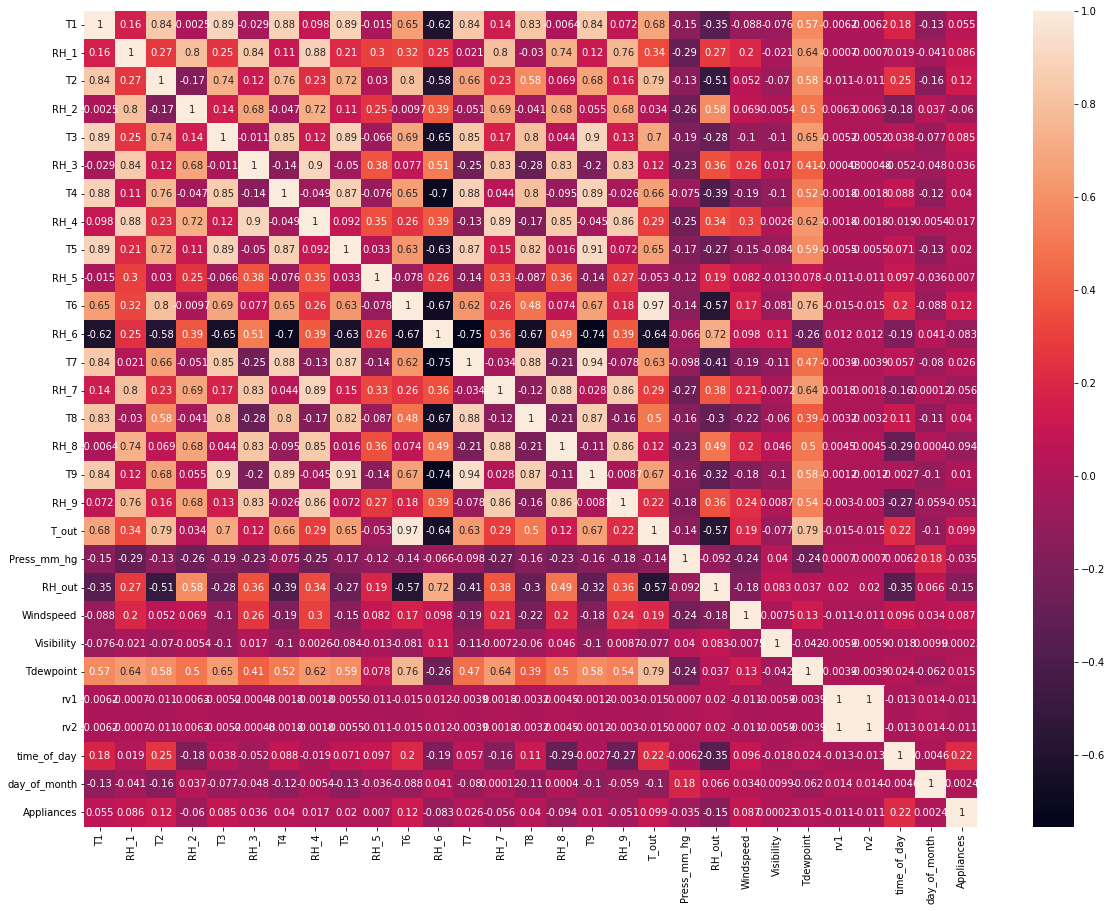

In [168]:
plt.figure(figsize = (20,15))
sns.heatmap(df.loc[:,numerical_features + ['Appliances']].corr(), annot = True)

'rv1' and 'rv2' have correlation of 1

In [169]:
(df['rv1'] ==df['rv2']).unique()

array([ True])

Since both the features are identical, one of them is eliminated from the dataset

In [170]:
df.drop('rv2', axis = 1, inplace = True)
numerical_features.remove('rv2')

In [171]:
numerical_features

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'time_of_day',
 'day_of_month']

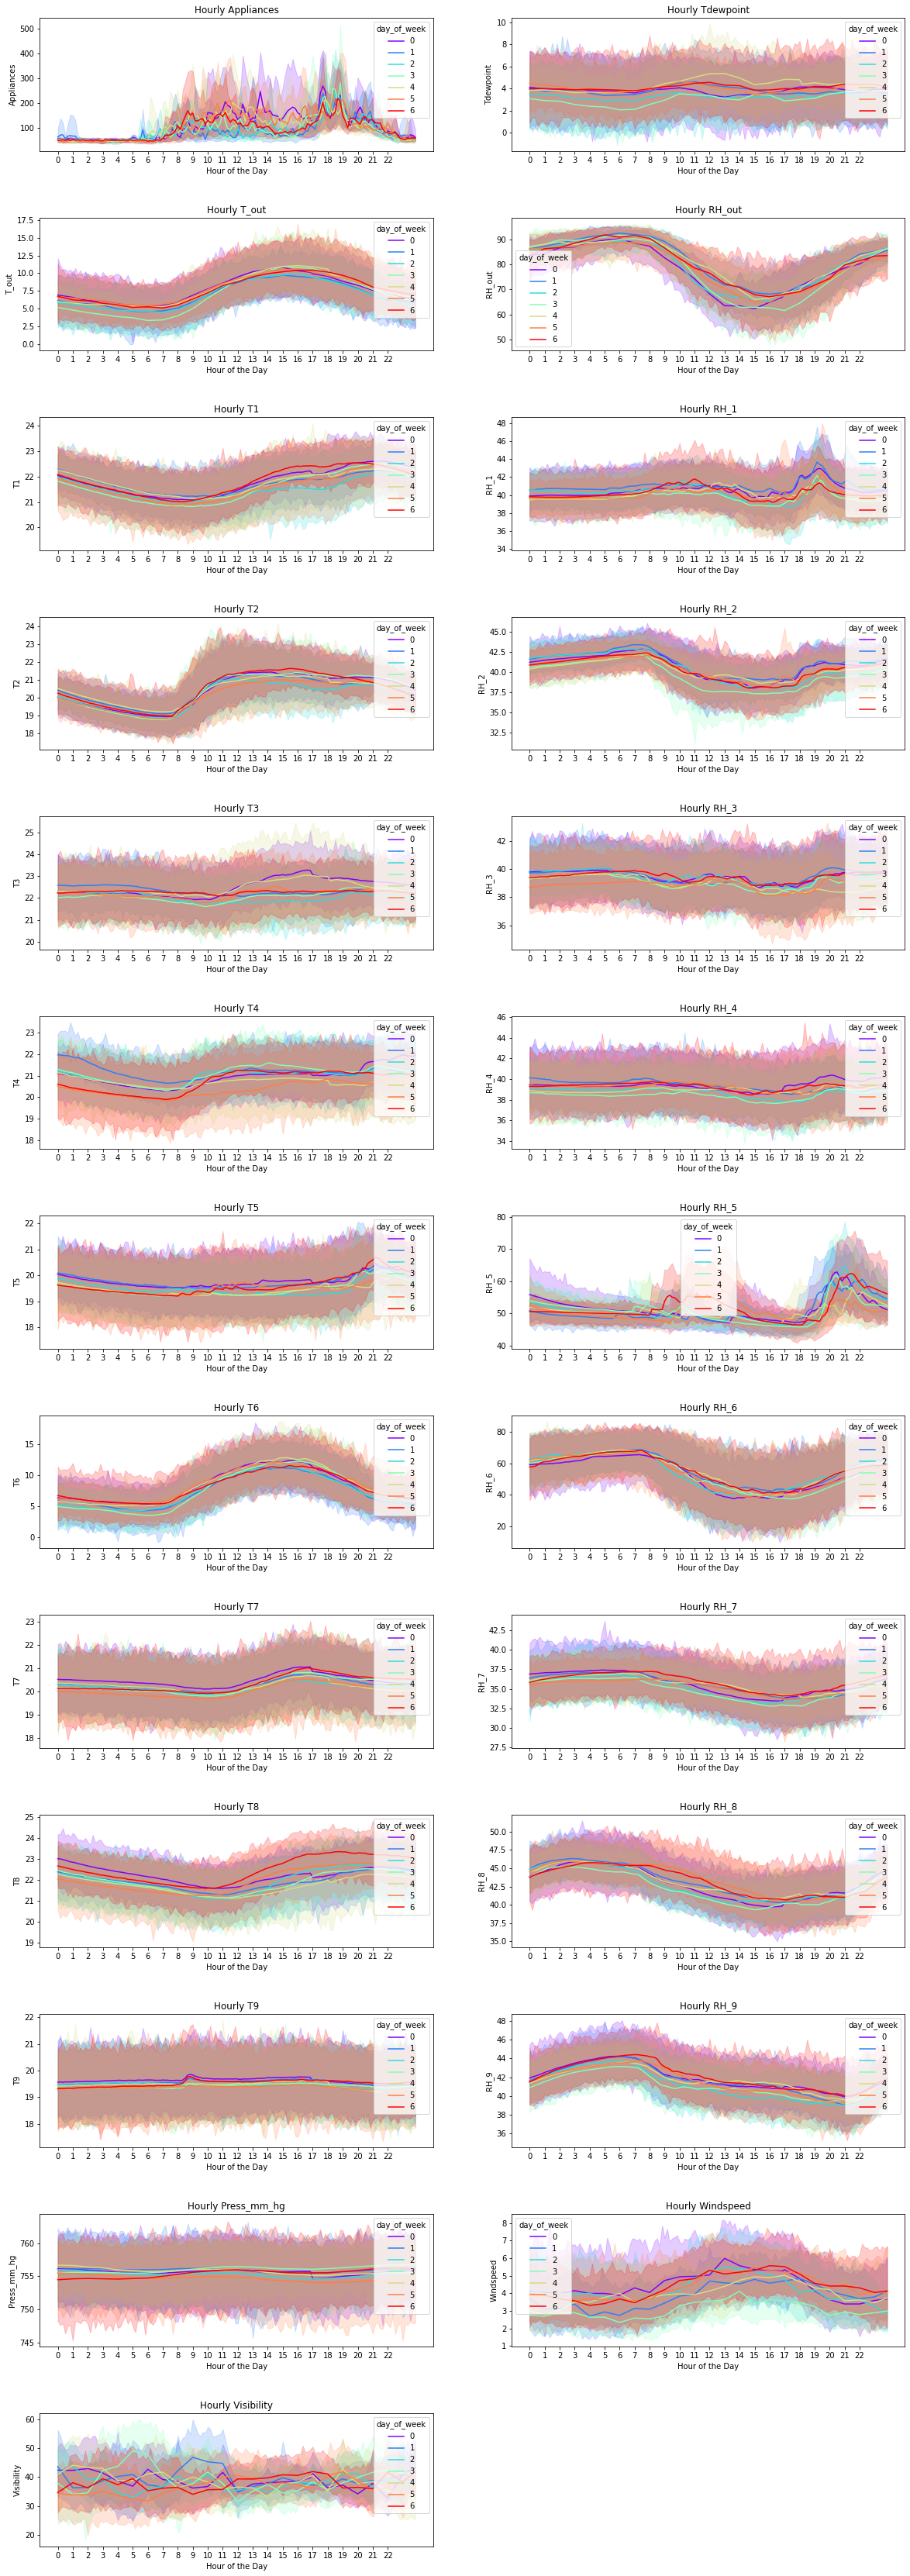

In [172]:
measurements = ['Appliances','Tdewpoint','T_out','RH_out','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','Press_mm_hg','Windspeed','Visibility',]
plt.figure(figsize=(20, 60))
for n, measurement in enumerate(measurements):
    # add a new subplot iteratively
    ax = plt.subplot(13, 2, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sns.lineplot(x= df['time_of_day'], y = df[measurement], hue = df['day_of_week'] ,palette = 'rainbow', ci =100, ax = ax)
    plt.xticks(np.arange(0,23,1))
    plt.title(f"Hourly {measurement}")
    plt.xlabel("Hour of the Day")
    plt.ylabel(measurement)
plt.show()


#Feature Engineering

Changing time_of_day into cyclical form

In [173]:
df['ytime_of_day'] = np.sin(np.pi*df['time_of_day']/12)
df['xtime_of_day'] = np.cos(np.pi*df['time_of_day']/12)
df.drop('time_of_day', axis=1,inplace = True)
numerical_features.remove('time_of_day')
numerical_features = numerical_features + ['ytime_of_day','xtime_of_day']

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Appliances    19735 non-null  int64  
 1   T1            19735 non-null  float64
 2   RH_1          19735 non-null  float64
 3   T2            19735 non-null  float64
 4   RH_2          19735 non-null  float64
 5   T3            19735 non-null  float64
 6   RH_3          19735 non-null  float64
 7   T4            19735 non-null  float64
 8   RH_4          19735 non-null  float64
 9   T5            19735 non-null  float64
 10  RH_5          19735 non-null  float64
 11  T6            19735 non-null  float64
 12  RH_6          19735 non-null  float64
 13  T7            19735 non-null  float64
 14  RH_7          19735 non-null  float64
 15  T8            19735 non-null  float64
 16  RH_8          19735 non-null  float64
 17  T9            19735 non-null  float64
 18  RH_9          19735 non-nu

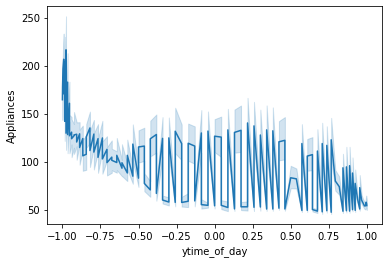

In [175]:
sns.lineplot(y = df['Appliances'],x = df['ytime_of_day'])

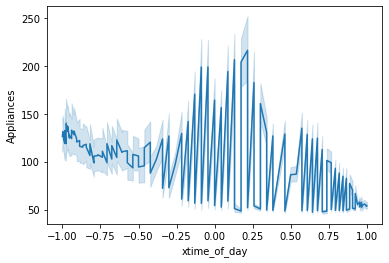

In [176]:
sns.lineplot(y= df['Appliances'],x = df['xtime_of_day'])

In [177]:
numerical_features[:]

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'day_of_month',
 'ytime_of_day',
 'xtime_of_day']

## Numerical Outliers

### Handling Outliers

#### Inter Quantile method

In [319]:

for ftr in numerical_features  : 
  print(ftr,'\n')
  q25, q75 = np.percentile(df[ftr], 25), np.percentile(df[ftr], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:
    
    def label(row):
      if row[ftr] > upper: 
        return 1
      if row[ftr] < lower:
        return 1
      else:
        return 0

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]
    
    df[ftr + '_Outlier'] =  df.apply (lambda row: label(row), axis=1)
    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

Appliances 

Percentiles: 25th=50.000, 75th=100.000, IQR=50.000

lower = -25.0 and upper = 175.0 
 
Identified outliers: 2138
Appliances Outliers Removed

-------



In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Appliances           19735 non-null  int64  
 1   T1                   19735 non-null  float64
 2   RH_1                 19735 non-null  float64
 3   T2                   19735 non-null  float64
 4   RH_2                 19735 non-null  float64
 5   T3                   19735 non-null  float64
 6   RH_3                 19735 non-null  float64
 7   T4                   19735 non-null  float64
 8   RH_4                 19735 non-null  float64
 9   T5                   19735 non-null  float64
 10  RH_5                 19735 non-null  float64
 11  T6                   19735 non-null  float64
 12  RH_6                 19735 non-null  float64
 13  T7                   19735 non-null  float64
 14  RH_7                 19735 non-null  float64
 15  T8                   19735 non-null 

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = (df.loc[:,numerical_features].copy())
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,4290.286643,T1
1,1659.547386,RH_1
2,2323.452401,T2
3,1727.690377,RH_2
4,1330.200279,T3
5,1602.359051,RH_3
6,944.930806,T4
7,1451.511030,RH_4
8,1160.635204,T5
9,80.297514,RH_5


#### Encoding Categorical Values

In [212]:

for ftr in categorical_feature:

  one_hot = pd.get_dummies(df[ftr],prefix = ftr, prefix_sep='_')
  df.drop(ftr, inplace = True, axis=1)
  df = df.join(one_hot)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Appliances           19735 non-null  int64  
 1   T1                   19735 non-null  float64
 2   RH_1                 19735 non-null  float64
 3   T2                   19735 non-null  float64
 4   RH_2                 19735 non-null  float64
 5   T3                   19735 non-null  float64
 6   RH_3                 19735 non-null  float64
 7   T4                   19735 non-null  float64
 8   RH_4                 19735 non-null  float64
 9   T5                   19735 non-null  float64
 10  RH_5                 19735 non-null  float64
 11  T6                   19735 non-null  float64
 12  RH_6                 19735 non-null  float64
 13  T7                   19735 non-null  float64
 14  RH_7                 19735 non-null  float64
 15  T8                   19735 non-null 

###Train Test Split

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [291]:
X,y = df.drop('Appliances', axis=1), df['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,  random_state=5)

#### Scaling

In [273]:
#function to scale
def do_scale(X_train, X_test, scaling_type = StandardScaler):
  scaler = scaling_type()
  scaler.fit(X_train)
  X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
  return X_train_scaled, X_test_scaled


In [292]:
X_train_scaled, X_test_scaled = do_scale(X_train,X_test)

In [294]:
X_train_scaled.shape, X_test_scaled.shape

((15788, 61), (3947, 61))

###Reducing Dimensionality

In [290]:
from sklearn.decomposition import PCA
#function to reduce dimension
def do_PCA(X_train, X_test, n_components):

  pca = PCA(n_components)
  pca.fit(X)
  X_train_PCA = pca.transform(X_train)
  X_test_PCA = pca.transform(X_test)

  exp_var_pca = pca.explained_variance_ratio_
  cum_sum_eigenvalues = np.cumsum(exp_var_pca)

  plt.figure(figsize = (10,10))
  plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
  plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
  plt.yticks(ticks = np.arange(0,1,0.05))
  plt.xticks(ticks = np.arange(0,n_components,1))
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.legend(loc='best')
  plt.tight_layout()
  plt.show()

  columns = [ f"PCA{i}" for i in np.arange(0,n_components ,1) ]

  X_train_PCA = pd.DataFrame(X_train_PCA, columns = columns )
  X_test_PCA = pd.DataFrame(X_test_PCA, columns = columns )
  

  return X_train_PCA,X_test_PCA

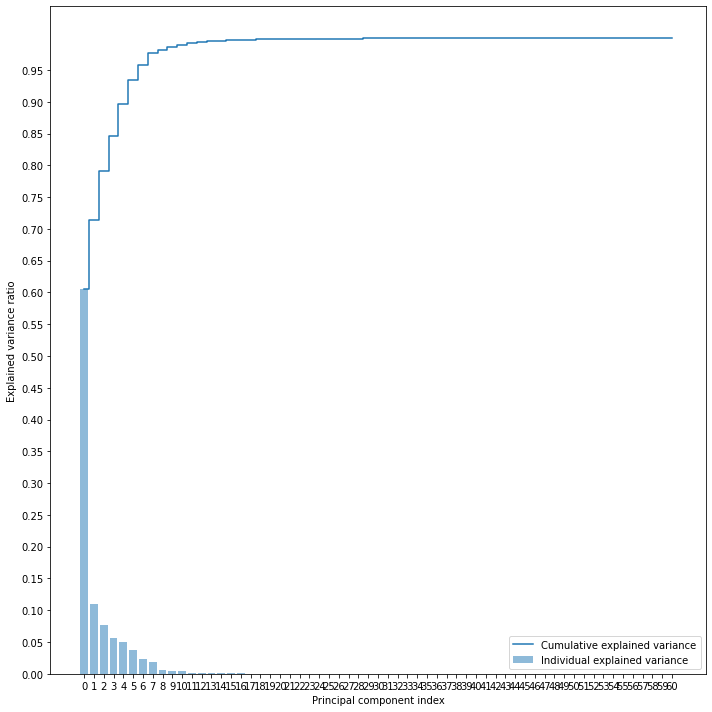

In [295]:
t1,t2 = do_PCA(X_train, X_test, n_components = 61)

From this graph we can preserve more than 95% of the variance of the dataset with 8 components(index 0 to 7) using PCA 

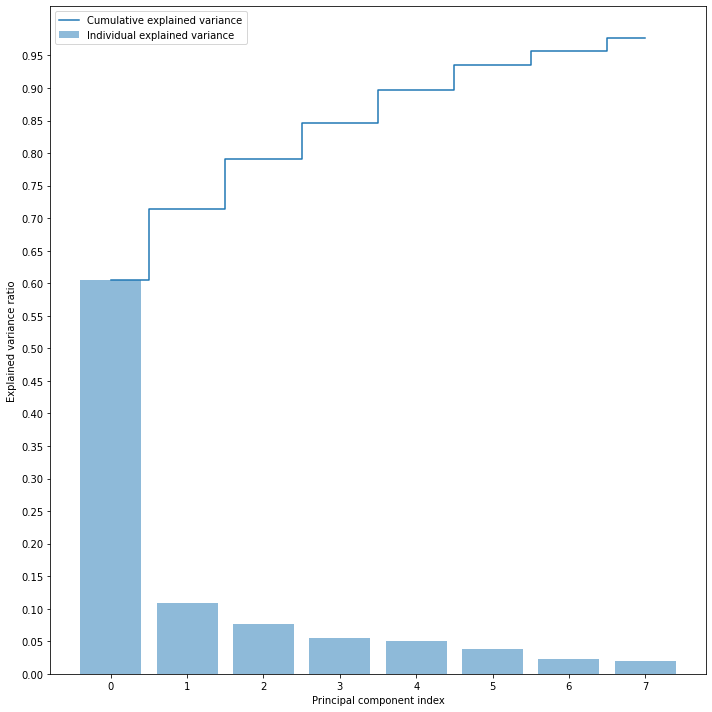

In [296]:
X_train_PCA,X_test_PCA = do_PCA(X_train, X_test,n_components = 8)

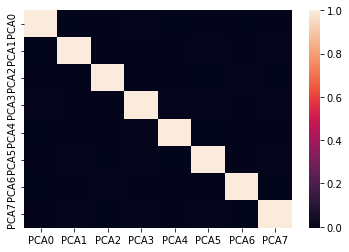

In [297]:
sns.heatmap(X_train_PCA.corr())

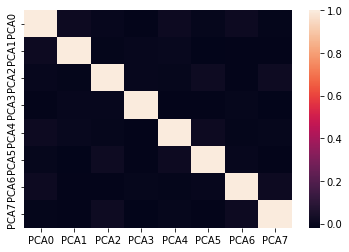

In [298]:
sns.heatmap(X_test_PCA.corr())

In [300]:
a = X_train_PCA.copy()
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,1.000049,PCA0
1,1.000069,PCA1
2,1.000063,PCA2
3,1.000061,PCA3
4,1.000046,PCA4
5,1.000086,PCA5
6,1.000056,PCA6
7,1.000076,PCA7


##Functions

In [341]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

In [326]:
report = {
    'Description':[],
    'model_name':[],
    'train_rmse':[],
    'train_mae':[],
    'train_R2':[],
    'train_max_error':[],
    'rmse':[],
    'mae':[],
    'R2':[],
    'max_error':[]

}
# function to evaluate and update model and score
def evaluate(technique, modelname, Model, X_train, y_train, X_test, y_test):
  from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, max_error

  if modelname in report['model_name']:
    print("Prexisting Model")
    return 0
  X_tr = X_train.copy()
  X_te = X_test.copy()

  print(f"-------\nTraining {str(Model)} ...")
  Model.fit(X_tr, y_train)

  print(f"\nPredicting{str(Model)} scores ...")

  y_pred = Model.predict(X_te)

  mae = mean_absolute_error(y_test,y_pred)
  report['mae'].append(mae)


  R2 = r2_score(y_test,y_pred)
  report['R2'].append(R2)

  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  report['rmse'].append(rmse)

  y_train_pred = Model.predict(X_tr)

  me= max_error(y_train_pred,y_train)
  report['max_error'].append(me)

  mae = mean_absolute_error(y_train_pred,y_train)
  report['train_mae'].append(mae)


  R2 = r2_score(y_train_pred,y_train)
  report['train_R2'].append(R2)

  rmse = np.sqrt(mean_squared_error(y_train_pred,y_train))
  report['train_rmse'].append(rmse)


  me= max_error(y_train_pred,y_train)
  report['train_max_error'].append(me)



  report['Description'].append(technique)
  report['model_name'].append(modelname)


  print(f"\nReport Updated\n----------\n")




In [312]:
#displays report in a dataframe
def display_report():
  return pd.DataFrame(report)

In [342]:
def get_models():
  models, names = list(), list()
  # LogReg
  models.append(LogisticRegression())
  names.append('LogisticRegression')

  # LinearReg
  models.append(LinearRegression())
  names.append('Linear Regression')

  #Lasso
  models.append(Lasso(alpha =0.5))
  names.append('Lasso Regression')

  #Ridge
  models.append(Ridge(alpha =0.5))
  names.append('Ridge Regression')


  # DecisionTreeClassifier
  models.append((DecisionTreeRegressor()))
  names.append('DecisionTree Regressor')

  #RandomForestClassifier
  models.append(RandomForestRegressor())
  names.append('RandomForest Regressor')


  # AdaBoostingClassifier
  models.append(AdaBoostRegressor())
  names.append('Adaptive Boosting Regressor')
  

  # GradientBoostingClassifier
  models.append(GradientBoostingRegressor())
  names.append('GradientBoosting Regressor')

  #BaggingClassifier
  models.append(BaggingRegressor())
  names.append('Bagging Regressor')

  # GNB
  models.append(KNeighborsClassifier())
  names.append('K Neighbors Classifier')


  return models, names

##Random Variable Evaluation

In [379]:
score = {
    'model':[],
    'ftr':[],
    'weights': []
}


In [380]:
LinearModels = [LinearRegression,Ridge, Lasso]
for model in LinearModels:
  lr = model()
  lr.fit(X_train_scaled, y_train)
  col = X_train.columns.to_list()
  index = col.index('rv1')
  score['weights'].append(lr.coef_[index])
  score['model'].append(model)
  score['ftr'].append('rv1')

                     

In [382]:
pd.DataFrame(score)

,model,ftr,weights
0,<class 'sklearn.linear_model._base.LinearRegre...,rv1,0.035179
1,<class 'sklearn.linear_model._ridge.Ridge'>,rv1,-0.019123
2,<class 'sklearn.linear_model._coordinate_desce...,rv1,-0.000000


Random Variable weights is almost 0 for the Regression models

## Evaluating Models

In [343]:
models, names = get_models()
for i in range(len(models)):
  evaluate("None", names[i], models[i] , X_train_scaled , y_train, X_test_scaled,y_test)

Prexisting Model
Prexisting Model
-------
Training Lasso(alpha=0.5) ...

PredictingLasso(alpha=0.5) scores ...

Report Updated
----------

-------
Training Ridge(alpha=0.5) ...

PredictingRidge(alpha=0.5) scores ...

Report Updated
----------

-------
Training DecisionTreeRegressor() ...

PredictingDecisionTreeRegressor() scores ...

Report Updated
----------

Prexisting Model
Prexisting Model
Prexisting Model
Prexisting Model
Prexisting Model


In [344]:
models, names = get_models()
for i in range(len(models)):
  evaluate("PCA", "PCA " + names[i], models[i] , X_train_PCA , y_train, X_test_PCA,y_test)

Prexisting Model
Prexisting Model
-------
Training Lasso(alpha=0.5) ...

PredictingLasso(alpha=0.5) scores ...

Report Updated
----------

-------
Training Ridge(alpha=0.5) ...

PredictingRidge(alpha=0.5) scores ...

Report Updated
----------

-------
Training DecisionTreeRegressor() ...

PredictingDecisionTreeRegressor() scores ...

Report Updated
----------

Prexisting Model
Prexisting Model
Prexisting Model
Prexisting Model
Prexisting Model


In [345]:
display_report()

,Description,model_name,train_rmse,train_mae,train_R2,train_max_error,rmse,mae,R2,max_error
0,None,LogisticRegression,99.110881,40.991893,-5.125548,1020.000000,103.662595,43.481125,0.033646,1020.000000
1,None,Linear Regression,91.198597,51.254214,-3.070045,974.840110,95.249528,53.469237,0.184136,974.840110
2,None,DecisionTree Classifier,0.000000,0.000000,1.000000,0.000000,88.134252,37.164935,0.301476,0.000000
3,None,RandomForest Regressor,24.409833,11.356955,0.921260,250.300000,63.699164,30.491234,0.635112,250.300000
4,None,Adaptive Boosting Regressor,146.058684,123.314421,-2.108133,510.688772,149.412231,125.636818,-1.007541,510.688772
5,None,GradientBoosting Regressor,79.554681,42.811604,-1.720061,717.173026,87.635616,46.919839,0.309357,717.173026
6,None,Bagging Regressor,29.640174,12.790347,0.887655,401.000000,67.317831,32.438814,0.592477,401.000000
7,None,K Neighbors Classifier,92.638737,33.446922,-3.367703,1020.000000,99.128454,41.018495,0.116333,1020.000000
8,PCA,PCA LogisticRegression,110.148632,49.625032,-101.054591,1030.000000,114.237317,51.816570,-0.173568,1030.000000
9,PCA,PCA Linear Regression,100.094704,58.101318,-28.615997,976.447563,104.128297,59.867764,0.024944,976.447563
